# July 11th, 2021

**Motivation**: Cleanup ***SVINET*** results, **showcase** plotting functions <br>


In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
svinet_ws = pjoin(os.environ['HOME'], 'Documents/workspaces/svinet')


# GitHub
sys.path.insert(0, pjoin(git_dir, 'Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.svinet import *
from utils.plotting import *
from utils.render import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Mice & Net

In [2]:
mice = Mice(Config(128))
mice.combine_dfs('rest')

key = 'sub-SLC'
metric = 'spearman'
mode = 'bold'
net = Network(
    mice=mice,
    key=key,
    metric=metric,
    mode=mode,
    binarize=False,
).fit()

## SVINET

new expt name: 'bold_spearman_sub-SLC_n128_p20'

some runs with k != 5 were excluded:
25 x k = 4

experiment loaded: 'bold_spearman_sub-SLC_n128_p20',  total # runs:  9975

...merging dicts: 0it [00:00, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

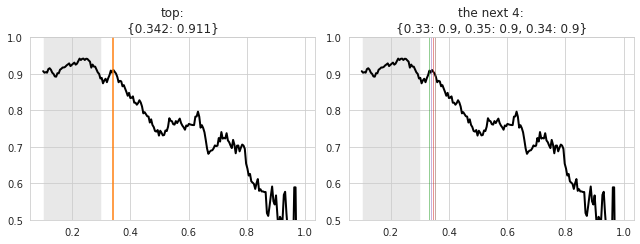

00 - 00:01:00  (dd - hh:mm:ss)

In [3]:
perc = 20
num_comm = 5
expt_name = next(k for k in net.graphs if f"p{perc}" in k)

start = time()
svinet = SVINET(
    net=net,
    num_k=num_comm,
    use_nltk=True,
    load_kws='linksampling',
).load_runs(expt_name, svinet_ws).fit(repeats=1)
end = time()

convert_time(end - start)

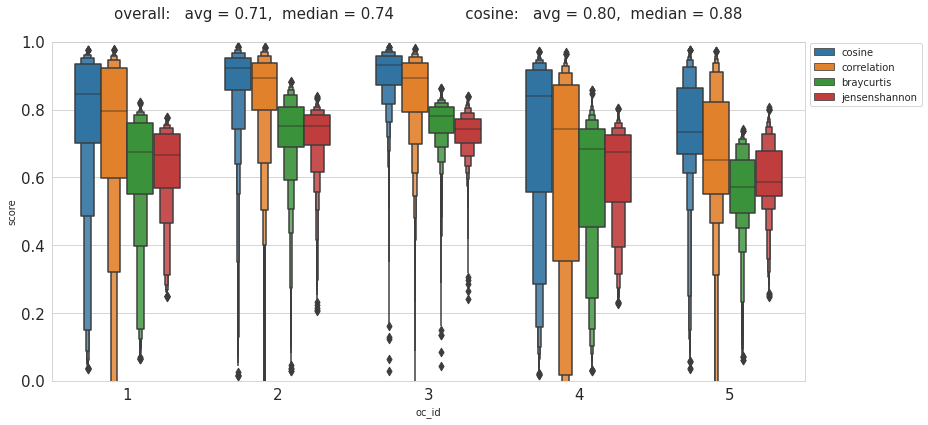

In [4]:
svinet.plot_performance()

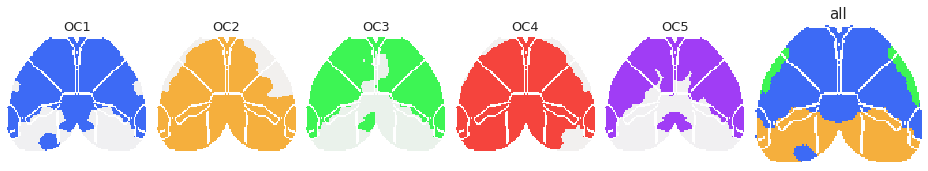

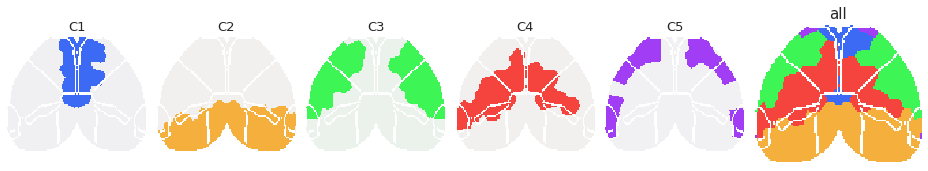

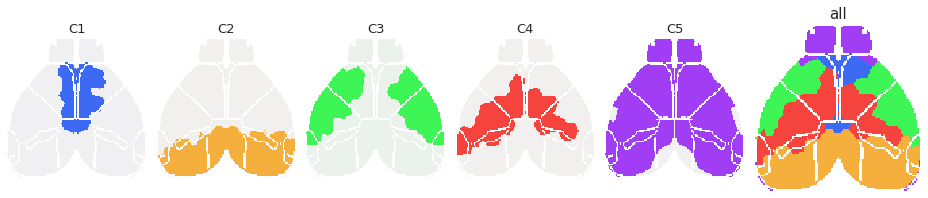

In [5]:
_ = svinet.plot_communities_2d(disjoint=False, cortex_only=True)
_ = svinet.plot_communities_2d(disjoint=True, cortex_only=True)
_ = svinet.plot_communities_2d(disjoint=True, cortex_only=False)

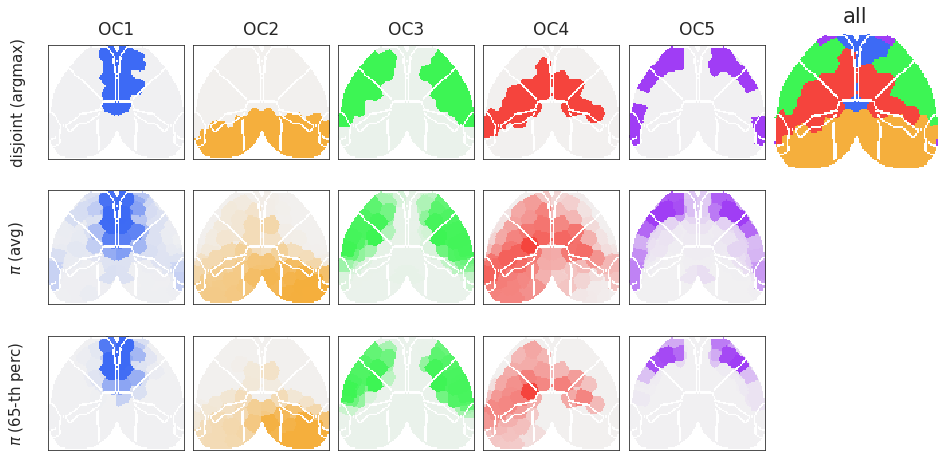

In [6]:
_ = svinet.plot_memberships_2d(cortex_only=True)

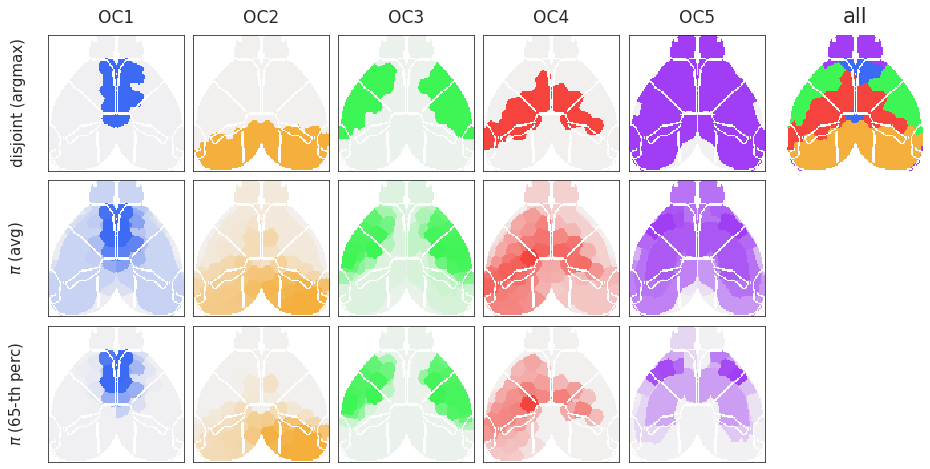

In [7]:
_ = svinet.plot_memberships_2d(cortex_only=False)

In [8]:
svinet.clusters

STR C_5 100% PAL C_5 100% OLF C_5 100% CTXsp C_5 100% HPF C_5 100% VIS C_2 93% C_4 2% TEa C_5 38% C_2 34% C_3 19% PERI C_5 76% C_3 7% C_2 3% ECT C_5 79% C_3 7% C_2 5% RSP C_2 75% C_1 13% C_4 6% AUD C_4 31% C_2 29% C_3 26% C_5 6% PTLp C_2 58% C_4 38% VISC C_3 74% C_5 18% SS C_3 64% C_4 29% C_2 2% SSp C_3 57% C_4 37% C_2 2% SSp-bfd C_4 52% C_3 37% C_2 7% SSp-ll C_4 96% C_3 2% SSp-m C_3 95% SSp-n C_3 93% C_4 2% SSp-tr C_4 95% C_2 3% SSp-ul C_3 58% C_4 39% SSp-un C_3 49% C_4 47% SSs C_3 82% C_4 7% C_2 3% GU C_5 52% C_3 40% ACA C_1 82% C_4 13% C_5 1% C_3 1% AI C_5 68% C_3 22% C_1 1% MO C_3 49% C_4 26% C_1 14% C_5 9% MOp C_3 64% C_4 27% C_1 6% MOs C_3 36% C_4 24% C_1 21% C_5 16% ILA C_1 96% PL C_1 92% C_5 3% C_3 2% C_4 1% ORB C_1 63% C_5 32% C_3 1% FRP C_5 56% C_1 39% C_3 4%

In [9]:
svinet.render(extras_dir, cortex_only=True)
svinet.render(extras_dir, cortex_only=False)

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/SVINET-overlap-cortex_bold_spearman_
sub-SLC_n128_p20_k5.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/SVINET-disjoint-cortex_bold_spearman
_sub-SLC_n128_p20_k5.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/SVINET-overlap-brain_bold_spearman_s
ub-SLC_n128_p20_k5.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/_extras/SVINET-disjoint-brain_bold_spearman_
sub-SLC_n128_p20_k5.html

## Memship bar plot

In [10]:
pi_cut_df, bins = svinet.get_membership_df(20)

  0%|          | 0/9975 [00:00<?, ?it/s]

...merging dicts: 0it [00:00, ?it/s]

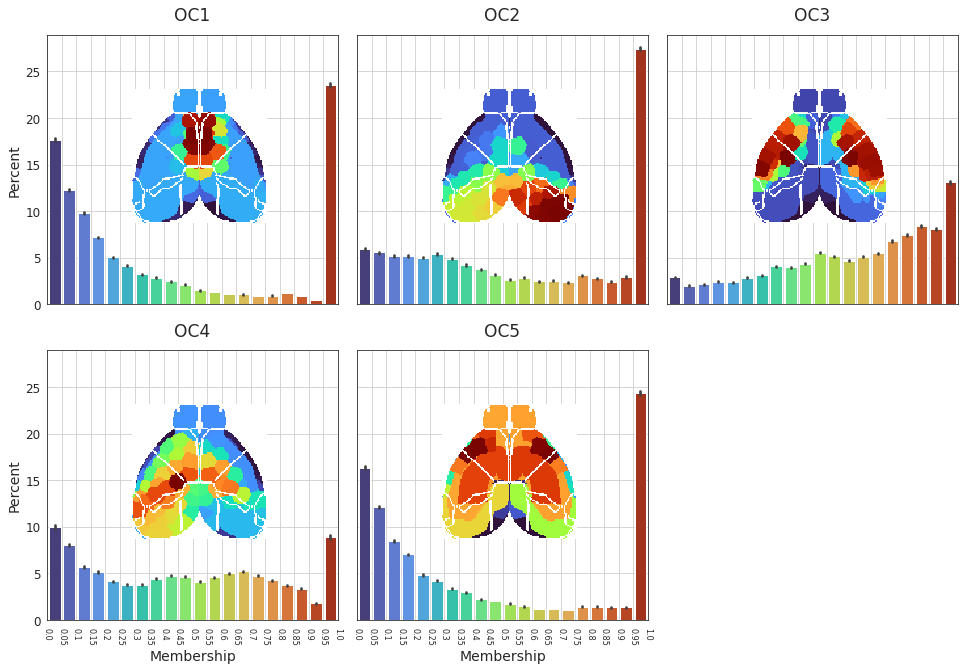

In [11]:
fig, axes, axes_inset = svinet.plot_memberships(pi_cut_df, bins, 'bar')

In [12]:
file = pjoin(tmp_dir, f"SVINET-pi_{svinet.expt_name}.pdf")
fig.savefig(file, dpi=300, bbox_inches='tight')

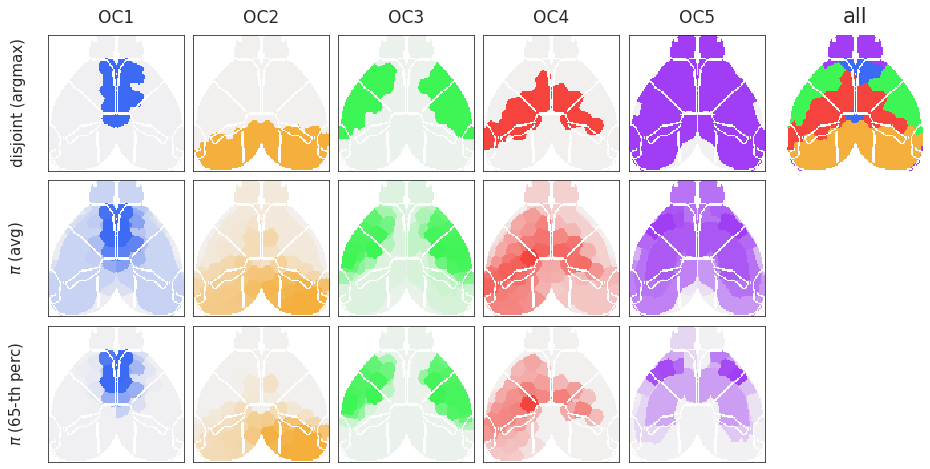

In [25]:
fig, axes = svinet.plot_memberships_2d(cortex_only=False)

In [26]:
file = pjoin(tmp_dir, f"SVINET-OCs_{svinet.expt_name}.pdf")
fig.savefig(file, dpi=300, bbox_inches='tight')

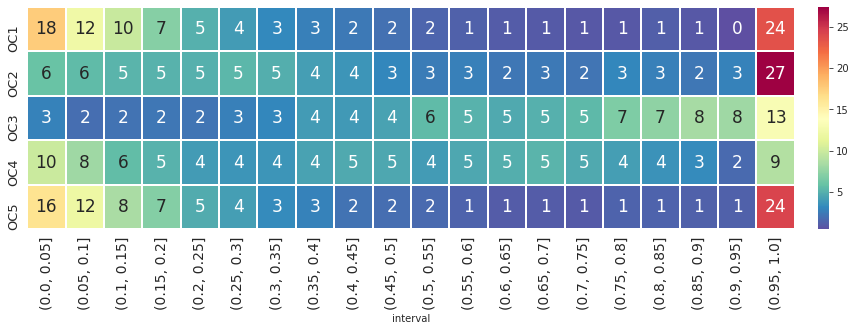

In [13]:
_ = plot_membership_heatmap(pi_cut_df, figsize=(13.5, 4.7))

### Compare centroids and memship_vol (old stuff)

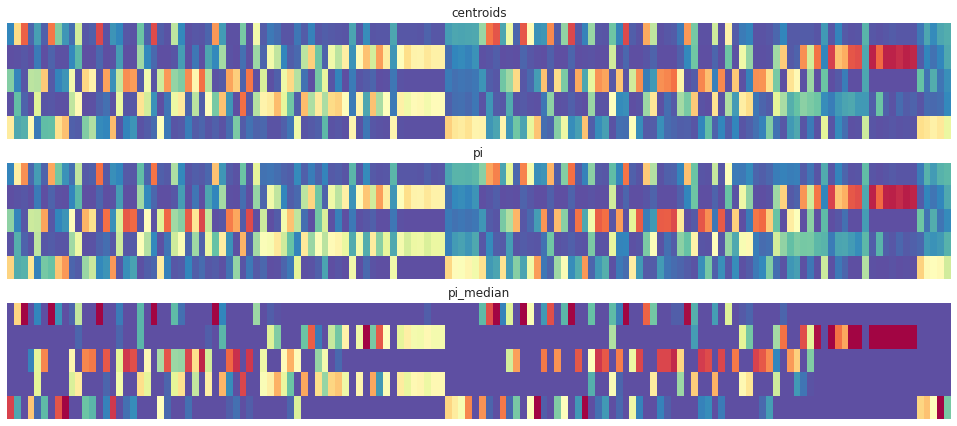

In [16]:
fig, axes = create_figure(3, 1, (13.5, 6), 'white')
data = {
    'centroids': svinet.centroids,
    'pi': svinet.pi,
    'pi_median':np.median(svinet.pi_all, axis=0),
}
for ax, (lbl, x) in zip(axes, data.items()):
    im = ax.imshow(x, cmap='Spectral_r', aspect=3.4, vmin=0, vmax=1)
    ax.set_title(lbl)
remove_ticks(axes)

In [17]:
def snr_plot(arrs, labels, sort: bool = False, sort_idx: int = 0):
    data = dict(zip(labels, arrs))
    ncols, nrows = len(data), 1
    fig, axes = create_figure(
        ncols,
        nrows,
        (13, 2 * ncols),
        'white',
        'col',
        tight_layout=False,
        constrained_layout=True,
    )
    for i, (ax, (lbl, x)) in enumerate(zip(axes, data.items())):
        cmap = sns.cubehelix_palette(
            start=i,
            rot=.7,
            dark=0.0,
            light=0.95,
            reverse=True,
            as_cmap=True,
        )
        if sort:
            x = [
                np.reshape([
                    e for _, e in
                    sorted(zip(arrs[sort_idx][j], x[j]))
                ], (1, -1))
                for j in range(num_comm)
            ]
            x = np.concatenate(x)
        im = ax.imshow(x, vmin=0, cmap=cmap)
        plt.colorbar(im, ax=ax, pad=0.01)
        ax.set_title(lbl, fontsize=14, y=1.02)
        ax.set(
            xticks=range(0, x.shape[1], 10),
            yticks=range(len(x)),
            yticklabels=[f"oc_{i}" for i in range(1, len(x)+1)],
            aspect=0.12 / ax.get_data_ratio(),
        )
    if sort:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('nodes', fontsize=14)
    plt.show()

In [18]:
pi_mu = np.mean(svinet.pi_all, axis=0)
pi_var = np.var(svinet.pi_all, axis=0)
snr = pi_mu ** 2 / np.maximum(pi_var, np.finfo(float).eps)

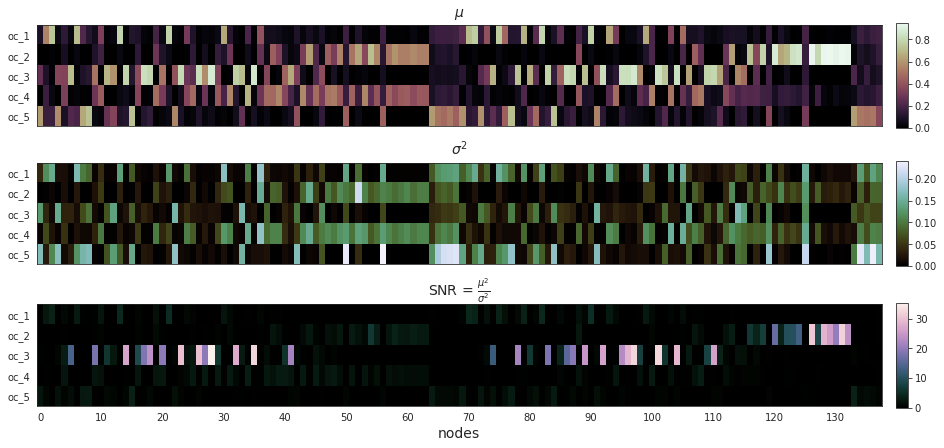

In [19]:
arrs = (pi_mu, pi_var, snr)
labels = (r'$\mu$', r'$\sigma^2$', r'SNR = $\frac{\mu^2}{\sigma^2}$')

snr_plot(arrs, labels)

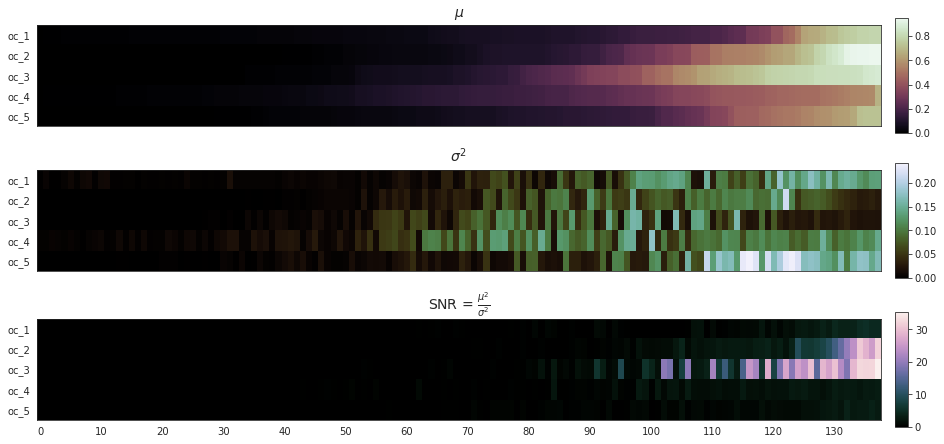

In [20]:
arrs = (pi_mu, pi_var, snr)
labels = (r'$\mu$', r'$\sigma^2$', r'SNR = $\frac{\mu^2}{\sigma^2}$')

snr_plot(arrs, labels, sort=True, sort_idx=0)

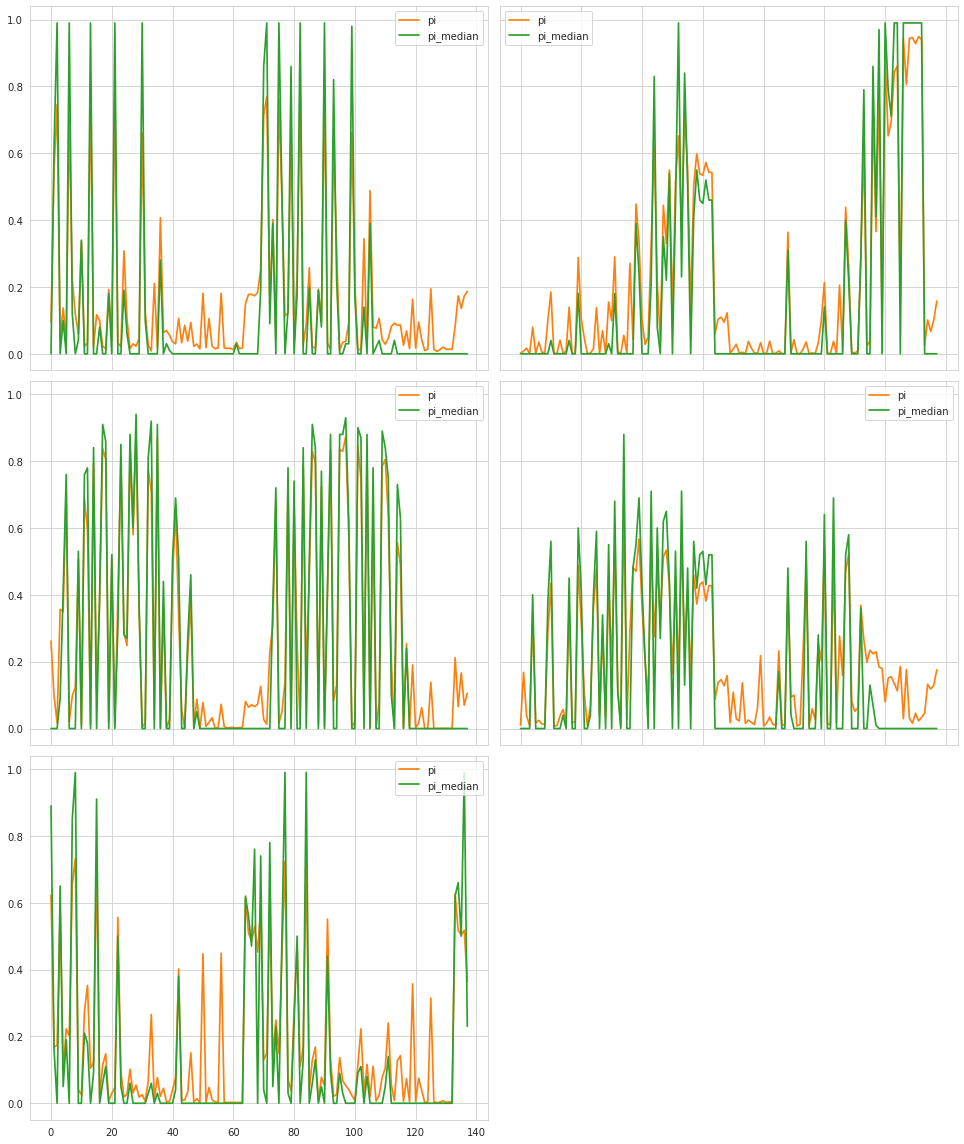

In [21]:
fig, axes = create_figure(3, 2, (13.5, 16), 'whitegrid', 'all', 'all')

for i, ax in zip(range(num_comm), axes.ravel()):
    for j, (lbl, x) in enumerate(data.items()):
        if lbl == 'centroids':
            continue
        ax.plot(x[i], color=f"C{j}", label=lbl, lw=1.7)
        ax.legend()
trim_axs(axes, num_comm)
plt.show()

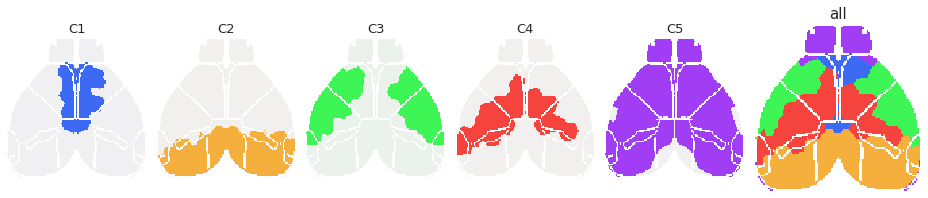

In [22]:
_ = svinet.plot_communities_2d(True)

In [23]:
bad = []
for idx, (i, j, k) in enumerate(zip(
    np.argmax(data['pi'], axis=0),
    np.argmax(data['pi_median'], axis=0),
    np.argmax(data['centroids'], axis=0), )):
    if not (i==k):
        bad.append(idx)
        print(idx, (i, j, k))


4
(2, 2, 3)

16
(2, 3, 3)

51
(1, 3, 3)

57
(1, 3, 3)

### Save for next time

In [97]:
mice = Mice(Config(512))
mice.combine_dfs('rest')

key = 'sub-SLC'
metric = 'spearman'
mode = 'bold'
net = Network(
    mice=mice,
    key=key,
    metric=metric,
    mode=mode,
    binarize=False,
).fit()

net.save_graphs(svinet_ws)

edge list 'bold_spearman_sub-SLC_n512_p30.txt' saved at
/home/hadi/Documents/workspaces/svinet/bold_spearman_sub-SLC_n512_p30

edge list 'bold_spearman_sub-SLC_n512_p25.txt' saved at
/home/hadi/Documents/workspaces/svinet/bold_spearman_sub-SLC_n512_p25

edge list 'bold_spearman_sub-SLC_n512_p20.txt' saved at
/home/hadi/Documents/workspaces/svinet/bold_spearman_sub-SLC_n512_p20

edge list 'bold_spearman_sub-SLC_n512_p15.txt' saved at
/home/hadi/Documents/workspaces/svinet/bold_spearman_sub-SLC_n512_p15

edge list 'bold_spearman_sub-SLC_n512_p10.txt' saved at
/home/hadi/Documents/workspaces/svinet/bold_spearman_sub-SLC_n512_p10